# PHASE 3 PROJECT

## Project Overview
The objective of this project is to generate insights and recommendations for business stakeholders in Maybach Airlines from building a classification model that predicts passenger satisfaction or dissatisfaction based on various flight service factors. This will aid in boosting its services to customers and increase customer retention.

## Business Understanding/Problem
Customer satisfaction is a critical aspect in the airline industry that quickly and directly impacts customer retention or customer drop off.

The airline company is experiencing a significant decrease in customer retention. By predicting whether a passenger experiences satisfaction/dissatisfaction, we will be able to determine some factors contributing to passenger dissatisfaction thus drawing actionable insights and recommendations to improve customer experience and reduce customer drop off.


## Data Understanding
The dataset we will be working with is sourced from kaggle and contains over 129000 records and 23 columns covering various flight service aspects such as `inflight_entertainment`, `customer_satisfaction` and more.

It is a `.csv` file bearing the name `airline_passenger_satisfaction.csv`.

## Data Preparation
We will start off by importing relevant libraries that will be used for data manipulation, visualizations, building and evaluating models. We shall load the dataset too.

In [1]:
# Importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_curve, auc

In [2]:
# Loading data
airline_data = pd.read_csv('Data/airline_passenger_satisfaction.csv')
airline_data.head()

,Unnamed: 0,Gender,customer_type,age,type_of_travel,customer_class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,...,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [3]:
# Dropping Unnecessary columns
airline_data.drop(columns=['Unnamed: 0'], inplace=True)

airline_data

,Gender,customer_type,age,type_of_travel,customer_class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,...,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,1,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
129876,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
129877,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,5,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
129878,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


In [4]:
airline_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             129880 non-null  object 
 1   customer_type                      129880 non-null  object 
 2   age                                129880 non-null  int64  
 3   type_of_travel                     129880 non-null  object 
 4   customer_class                     129880 non-null  object 
 5   flight_distance                    129880 non-null  int64  
 6   inflight_wifi_service              129880 non-null  int64  
 7   departure_arrival_time_convenient  129880 non-null  int64  
 8   ease_of_online_booking             129880 non-null  int64  
 9   gate_location                      129880 non-null  int64  
 10  food_and_drink                     129880 non-null  int64  
 11  online_boarding                    1298

In [5]:
# Statistical Summary of numeric columns
airline_data.describe()

,age,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1190.316392,2.728696,3.057599,2.756876,2.976925,3.204774,3.252633,3.441361,3.358077,3.383023,3.350878,3.632114,3.306267,3.642193,3.286326,14.713713,15.091129
std,15.119360,997.452477,1.329340,1.526741,1.401740,1.278520,1.329933,1.350719,1.319289,1.334049,1.287099,1.316252,1.180025,1.266185,1.176669,1.313682,38.071126,38.465650
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


### Data Cleaning

In [6]:
# Checking for missing values by percentage
missing = (airline_data.isnull().sum()/len(airline_data))*100
missing

Gender                               0.000000
customer_type                        0.000000
age                                  0.000000
type_of_travel                       0.000000
customer_class                       0.000000
flight_distance                      0.000000
inflight_wifi_service                0.000000
departure_arrival_time_convenient    0.000000
ease_of_online_booking               0.000000
gate_location                        0.000000
food_and_drink                       0.000000
online_boarding                      0.000000
seat_comfort                         0.000000
inflight_entertainment               0.000000
onboard_service                      0.000000
leg_room_service                     0.000000
baggage_handling                     0.000000
checkin_service                      0.000000
inflight_service                     0.000000
cleanliness                          0.000000
departure_delay_in_minutes           0.000000
arrival_delay_in_minutes          

We have some 30% of missing values in the column `arrival_delay_in_minutes`. We shall tackle this by filling in with the median.

In [7]:
# Filling in for missing values with median
airline_data['arrival_delay_in_minutes'].fillna(airline_data['arrival_delay_in_minutes'].median(), inplace=True)

# Checking for missing values
airline_data.isnull().sum()

Gender                               0
customer_type                        0
age                                  0
type_of_travel                       0
customer_class                       0
flight_distance                      0
inflight_wifi_service                0
departure_arrival_time_convenient    0
ease_of_online_booking               0
gate_location                        0
food_and_drink                       0
online_boarding                      0
seat_comfort                         0
inflight_entertainment               0
onboard_service                      0
leg_room_service                     0
baggage_handling                     0
checkin_service                      0
inflight_service                     0
cleanliness                          0
departure_delay_in_minutes           0
arrival_delay_in_minutes             0
satisfaction                         0
dtype: int64

In [8]:
# Checking for duplicate rows
airline_data.duplicated().sum()

0

In [12]:
# Identifying and separating categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

### Feature Selection

In the code cell below, we shall separate the target predictor for our analysis,`satisfaction` from the rest of the features.

In [13]:
# Selecting features(x) and target variable(y)
X = airline_data.drop(columns=['satisfaction'])
y = airline_data['satisfaction'].apply(lambda x: 1 if x == "satisfied" else 0)

## Visualizations(EDA)

Below we shall visualize target variable distribution to check for imbalance.

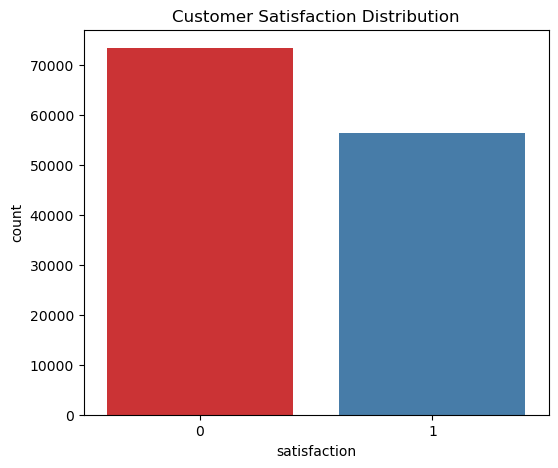

In [14]:
class_distr = y.value_counts(normalize=True)

# Plot distribution
plt.figure(figsize=(6,5))
sns.countplot(x=y, palette='Set1')
plt.title('Customer Satisfaction Distribution')
plt.show()

**Observation :**
There is a larger number of dissatisfied customers than satisfied ones.

We will also visualize how different categorical features eg.`Gender`, `type_of_travel` play out against customer satisfaction to get a better understanding for our analysis. 

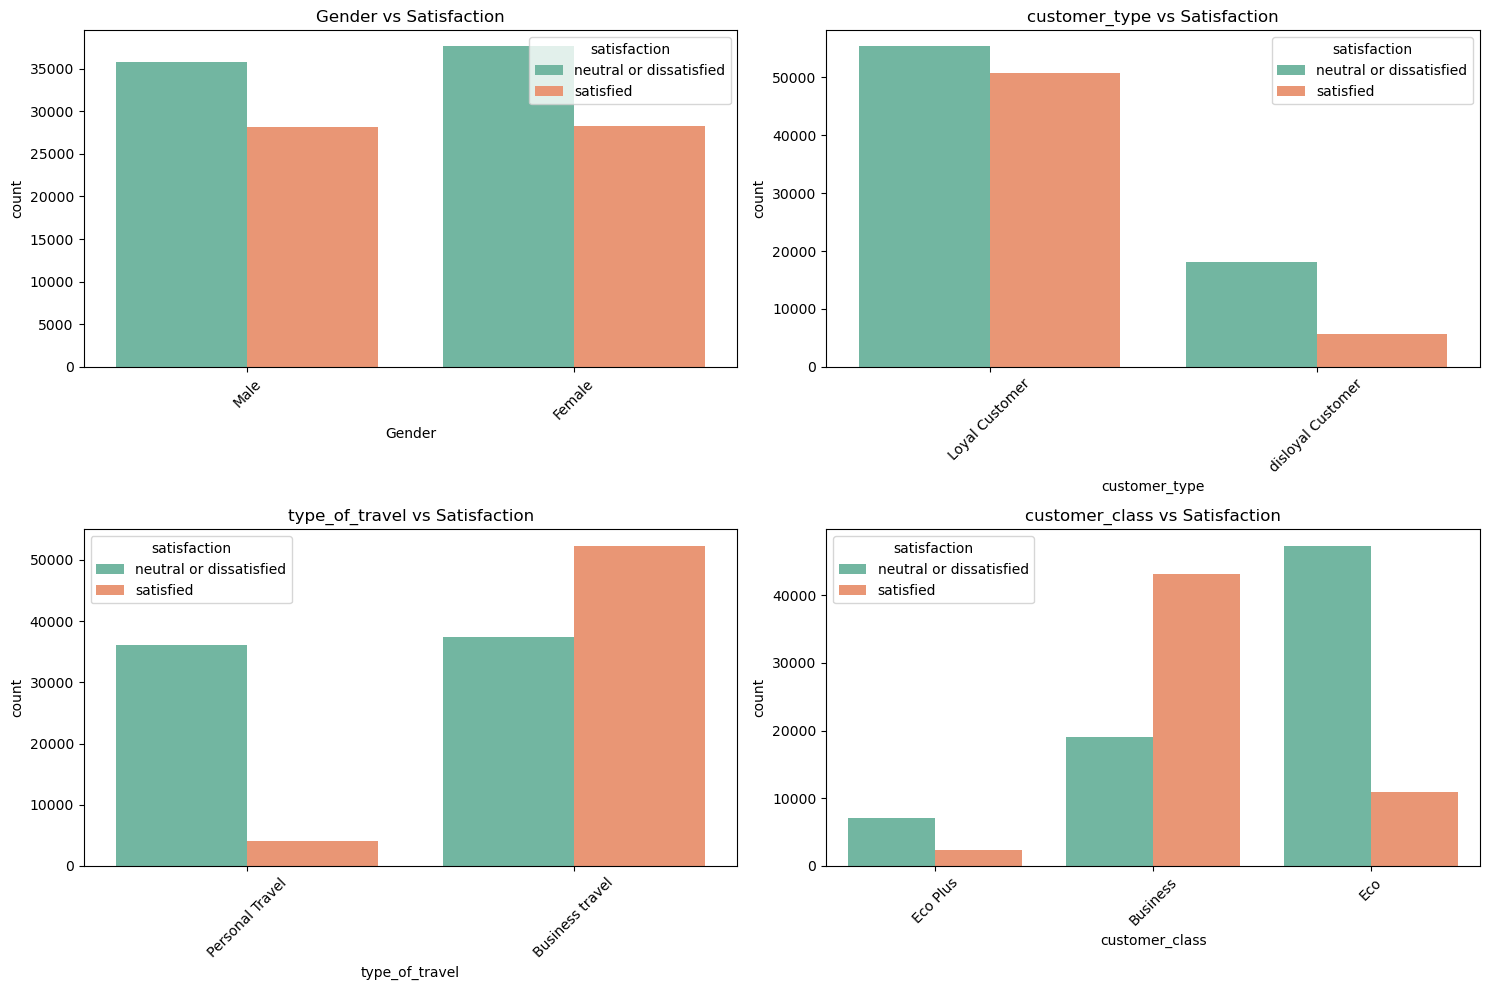

In [15]:
# Categorical Features vs Satisfaction
plt.figure(figsize=(15, 10))
for i, feature in enumerate(categorical_cols):
    plt.subplot(2, 2, i + 1)
    sns.countplot(data=airline_data, x=feature, hue='satisfaction', palette='Set2')
    plt.title(f'{feature} vs Satisfaction')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Some key observations made :**

* Most of the loyal customers are by far more satisfied than the disloyal customers.
* Business travellers are noticeably more satisfied customers than those travelling for individual reasons.
* Amongst various classes, it is indeed common to see that passengers in more exclusive classes(`Business`) having a higher portion of satisfied customers compared to lower less exclusive classes(`Economy`).
* Gender seems to be balanced out with close to a similar number of satisfied customers for each gender respectively as well as dissatisfied customers.

## Modeling
We shall proceed by building models which will aid in predicting customer drop off based on customer satisfaction. For starters, we will perform a train test split with `30 %` going to testing and `70 %` for training.

In [16]:
# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

To ensure efficiency, consistency across all our models and prevent data leakage, we will build a model pipeline carries out preprocessing steps and applies them both to the training and test set.

In [17]:
# Preprocessing Pipeline
preprocessor = ColumnTransformer(transformers=[('num', StandardScaler(), numerical_cols), 
                                               ('cat', OneHotEncoder(drop='first'), categorical_cols)])

### Building the Models

In [18]:
# Logistic Regression(Baseline Model)
lr_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', LogisticRegression(max_iter=200, random_state=42))])
lr_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['age', 'flight_distance', 'inflight_wifi_service',
       'departure_arrival_time_convenient', 'ease_of_online_booking',
       'gate_location', 'food_and_drink', 'online_boarding', 'seat_comfort',
       'inflight_entertainment', 'onboard_service', 'leg_room_service',
       'baggage_handling', 'checkin_service', 'inflight_service',
       'cleanliness', 'departure_delay_in_minutes',
       'arrival_delay_in_minutes'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  Index(['Gender', 'customer_type', 'type_of_travel', 'customer_class'], dtype='object'))])),
                ('classifier',
                 LogisticRegression(max_iter=200, random_state=42))])

In [19]:
# Decision Tree Model
dt_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', DecisionTreeClassifier(random_state=42))])
dt_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['age', 'flight_distance', 'inflight_wifi_service',
       'departure_arrival_time_convenient', 'ease_of_online_booking',
       'gate_location', 'food_and_drink', 'online_boarding', 'seat_comfort',
       'inflight_entertainment', 'onboard_service', 'leg_room_service',
       'baggage_handling', 'checkin_service', 'inflight_service',
       'cleanliness', 'departure_delay_in_minutes',
       'arrival_delay_in_minutes'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  Index(['Gender', 'customer_type', 'type_of_travel', 'customer_class'], dtype='object'))])),
                ('classifier', DecisionTreeClassifier(random_state=42))])

In [20]:
# Random Forest Model
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', RandomForestClassifier(random_state=42))])
rf_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['age', 'flight_distance', 'inflight_wifi_service',
       'departure_arrival_time_convenient', 'ease_of_online_booking',
       'gate_location', 'food_and_drink', 'online_boarding', 'seat_comfort',
       'inflight_entertainment', 'onboard_service', 'leg_room_service',
       'baggage_handling', 'checkin_service', 'inflight_service',
       'cleanliness', 'departure_delay_in_minutes',
       'arrival_delay_in_minutes'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  Index(['Gender', 'customer_type', 'type_of_travel', 'customer_class'], dtype='object'))])),
                ('classifier', RandomForestClassifier(random_state=42))])

### Training Models

In [21]:
# Training Logistic Regression Model
lr_pipeline.fit(X_train, y_train)

# Predictions on test set
y_pred_lr = lr_pipeline.predict(X_test)

# Training Decision Tree Model
dt_pipeline.fit(X_train, y_train)

# Predictions on test set
y_pred_dt = dt_pipeline.predict(X_test)

# Training Random Forest Model
rf_pipeline.fit(X_train, y_train)

# Predictions on test set
y_pred_rf = rf_pipeline.predict(X_test)

## Model Performance Evaluation

In [22]:
# Evaluating Model(Logistic Regression)
print("Logistic Regression Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred_lr))
print("Classification Report: \n", classification_report(y_test, y_pred_lr))

# Evaluating Model(Decision Tree)
print("Decision Tree Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred_dt))
print("Classification Report: \n", classification_report(y_test, y_pred_dt))

# Model Evaluation(Random Forest Model)
print("Random Forest Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report: \n", classification_report(y_test, y_pred_rf))

Logistic Regression Model Performance:
Accuracy: 0.8739605789959963
Confusion Matrix: 
 [[19829  2150]
 [ 2761 14224]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.90      0.89     21979
           1       0.87      0.84      0.85     16985

    accuracy                           0.87     38964
   macro avg       0.87      0.87      0.87     38964
weighted avg       0.87      0.87      0.87     38964

Decision Tree Model Performance:
Accuracy: 0.9440252540806898
Confusion Matrix: 
 [[20850  1129]
 [ 1052 15933]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.95      0.95     21979
           1       0.93      0.94      0.94     16985

    accuracy                           0.94     38964
   macro avg       0.94      0.94      0.94     38964
weighted avg       0.94      0.94      0.94     38964

Random Forest Model Performance:
Accuracy: 0.9610152961708244
Co

We shall carry out a plot distribution to see which model performs best according to `accuracy`.

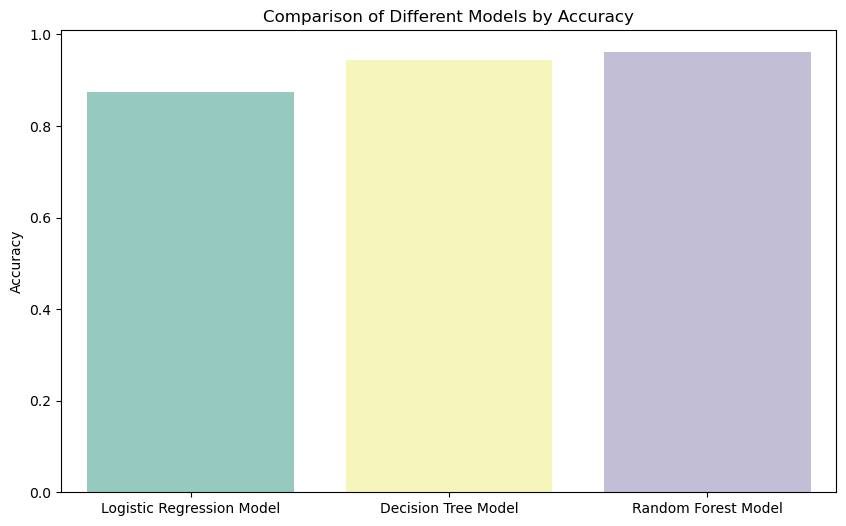

In [23]:
# Visualizing different model performances using bar plots
models = pd.Series(['Logistic Regression Model', 'Decision Tree Model', 'Random Forest Model'])
accuracies = [accuracy_score(y_test, y_pred_lr), 
              accuracy_score(y_test, y_pred_dt),
              accuracy_score(y_test, y_pred_rf)]
plt.figure(figsize=(10,6))
sns.barplot(x=models, y=accuracies, palette='Set3')
plt.title('Comparison of Different Models by Accuracy')
plt.ylabel('Accuracy')
plt.show()

**Insights :**

From the implemented models,

* Logistic regression model ranks last in performance with the lowest accuracy although it does perform well.
* The decision tree model has slight improvement with a higher accuracy than the logistic model.
* The random forest model ranks best at performance with the highest accuracy with a balanced recall and precision showing the effectiveness of this model(We shall tune it to optimize its performance)

### ROC Curve

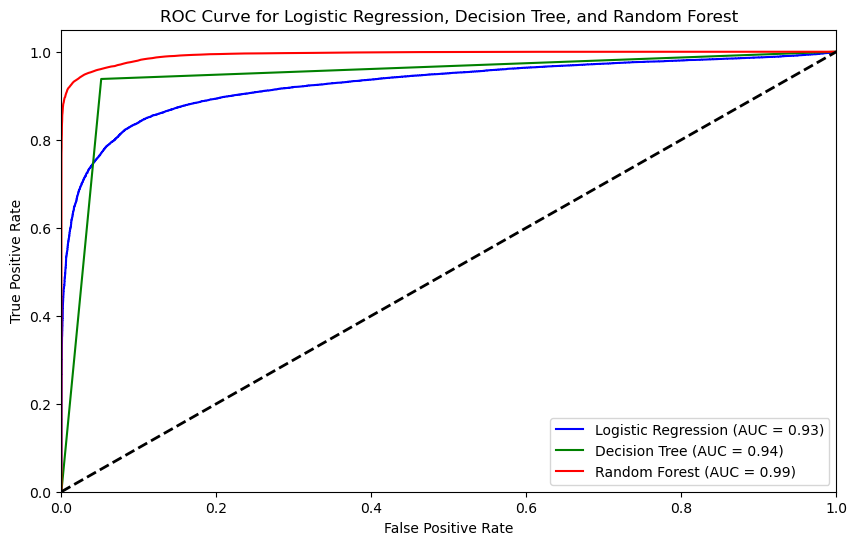

In [24]:
# Logistic Regression
y_prob_lr = lr_pipeline.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

# Decision Tree
y_prob_dt = dt_pipeline.predict_proba(X_test)[:, 1]
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Random Forest
y_prob_rf = rf_pipeline.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plotting ROC Curves
plt.figure(figsize=(10,6))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})', color='blue')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})', color='green')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})', color='red')

plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Dashed diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression, Decision Tree, and Random Forest')
plt.legend(loc='lower right')
plt.show()

**Insights :**  The random forest model with the highest AUC, has the highest true positive rate. This means it is overally the best performing model at correctly predicting the proportion of customers that are likely to drop off due to various flight service factors.

Below we shall generate code that will enable us to carry out feature importance and visualize it to see the most relevant features in predicting customer satisfaction in Maybach Airlines. 

In [32]:
# Get feature names after preprocessing
feature_names_num = numerical_cols
feature_names_cat = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)
feature_names = list(feature_names_num) + list(feature_names_cat)

# Extract feature importances from the Random Forest model
feature_importances = rf_pipeline.named_steps['classifier'].feature_importances_

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

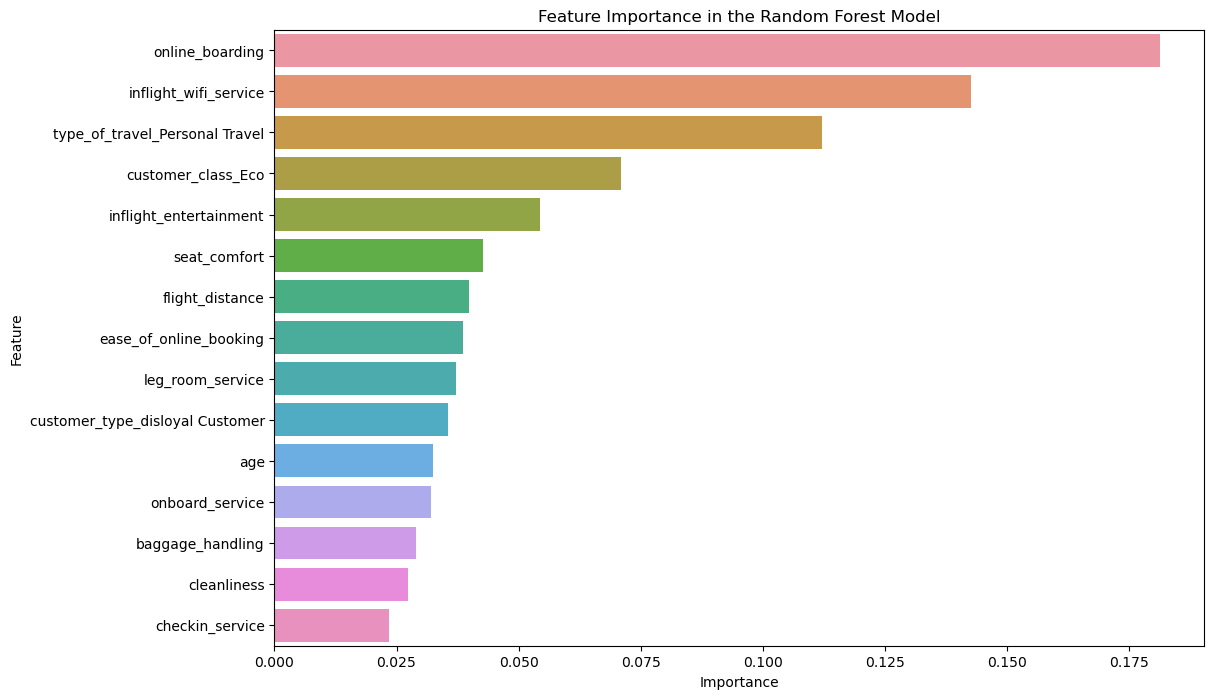

In [46]:
# Plot the feature importances(top 15)
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(15))
plt.title('Feature Importance in the Random Forest Model')
plt.show()

**Insights :**

* Online boarding appears to take most importance in our random forest model. 
* Inflight wifi and personal type of travel also have a significant impact in customer satisfaction.

## Tuning our model: Hyperparemeter
We shall continue by scaling up our model by optimizing its performance. For this we will continue by hyperparemeter tuning the random forest model as a result of its overally good performance and ability to generate robust predictions.

In [35]:
# Defining the parameter grid
param_grid = {'classifier__n_estimators': [50, 100, 200, 300],
              'classifier__max_depth': [10, 20, 30,],
              'classifier__min_samples_split': [2, 5, 10],
              'classifier__min_samples_leaf': [1, 2, 4],
              'classifier__bootstrap': [True, False]
             }

In [36]:
# Using RandomizedSearchCV for hyperparemter tuning 
rf_random_search = RandomizedSearchCV(estimator = rf_pipeline, param_distributions = param_grid, n_iter = 50, cv = 3, verbose = 2, random_state = 42, n_jobs = -1)

In [37]:
# Fitting model to train set
rf_random_search.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               StandardScaler(),
                                                                               Index(['age', 'flight_distance', 'inflight_wifi_service',
       'departure_arrival_time_convenient', 'ease_of_online_booking',
       'gate_location', 'food_and_drink', 'online_boarding', 'seat_comfort',
       'inflight_entertainment', 'onboard_service', 'le...
                                                                               Index(['Gender', 'customer_type', 'type_of_travel', 'customer_class'], dtype='object'))])),
                                             ('classifier',
                                              RandomForestClassifier(random_state=42))]),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'classifier__bootstrap': [True, False],
                                        'classifier__max_depth': [10, 20, 30],
                                        'classifier__min_samples_leaf': [1, 2,
                                                                         4],
                                        'classifier__min_samples_split': [2, 5,
                                                                          10],
                                        'classifier__n_estimators': [50, 100,
                                                                     200,
                                                                     300]},
                   random_state=42, verbose=2)

In [38]:
# Getting best parameters and best accuracy score)
print("Best cross validated accuracy:", rf_random_search.best_score_)
print("Best paremeters found:", rf_random_search.best_params_)

Best cross validated accuracy: 0.961931897643178
Best paremeters found: {'classifier__n_estimators': 200, 'classifier__min_samples_split': 10, 'classifier__min_samples_leaf': 1, 'classifier__max_depth': 30, 'classifier__bootstrap': False}


### Model Evaluation
We shall use the tuned model to predict our test set and evaluate its performance by showing accuracy, confuson matrix and drawing a classification report.

In [39]:
best_rf_model = rf_random_search.best_estimator_
y_pred_rf_best = best_rf_model.predict(X_test)

print("Tuned Random Forest Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf_best))
print("Confusion Matrix \n:" , 
      confusion_matrix(y_test, y_pred_rf_best))
print("Classification Report: \n", 
      classification_report(y_test, y_pred_rf_best))

Tuned Random Forest Performance:
Accuracy: 0.9625551791397187
Confusion Matrix 
: [[21538   441]
 [ 1018 15967]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.98      0.97     21979
           1       0.97      0.94      0.96     16985

    accuracy                           0.96     38964
   macro avg       0.96      0.96      0.96     38964
weighted avg       0.96      0.96      0.96     38964



**Findings :**  
There has been a very slight improvement in our tuned model's performance by accuracy.

## Conclusions/Recommendations
* Improving service qualities such as boosting in flight wifi, online boarding, seat comfort etc as such features directly affect customer satisfation.
* Enhancing business class services by improving premium services for these passengers. 
* Opening loyalty programs such as offering discounts to loyal customers hence retaining such customers.
* Minimizing delays by enhancing operational efficiency eg. scaling up technology, improving ground services etc that will contribute to customer satisfaction.
* Refining the models by updating them regularly as fresh data is collected to ensure accuracy in predictions.